# 1. Descriptive Statistics

앞선 과정에서 병합한 데이터의 기술 통계량을 확인한다.


In [1]:
import os
from datetime import datetime as dt

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
DATA_DIR = '../../data/diabetes-project/0.merge/'
store_dir = '../../data/diabetes-project/'

## 데이터 불러오기

In [3]:
df_data = pd.read_pickle(os.path.join(DATA_DIR, 'df_data_22-09-03.pkl')).reset_index()
print(df_data.shape)
df_data.head()

(29330, 6)


,index,date,time,code,value,pid
0,0,04-21-1991,9:09,58,100,01
1,1,04-21-1991,9:09,33,9,01
2,2,04-21-1991,9:09,34,13,01
3,3,04-21-1991,17:08,62,119,01
4,4,04-21-1991,17:08,33,7,01


data shape: (29330, 5)

## 데이터 기본 정보

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29330 entries, 0 to 29329
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   29330 non-null  int64 
 1   date    29297 non-null  object
 2   time    29330 non-null  object
 3   code    29330 non-null  int64 
 4   value   29297 non-null  object
 5   pid     29330 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.3+ MB


date와 value에 결측이 있다는 것과, code를 제외하면 타입이 제멋대로 설정되어 있는 것을 알 수 있음.

### 결측 데이터 탐색 및 처리

<AxesSubplot:>

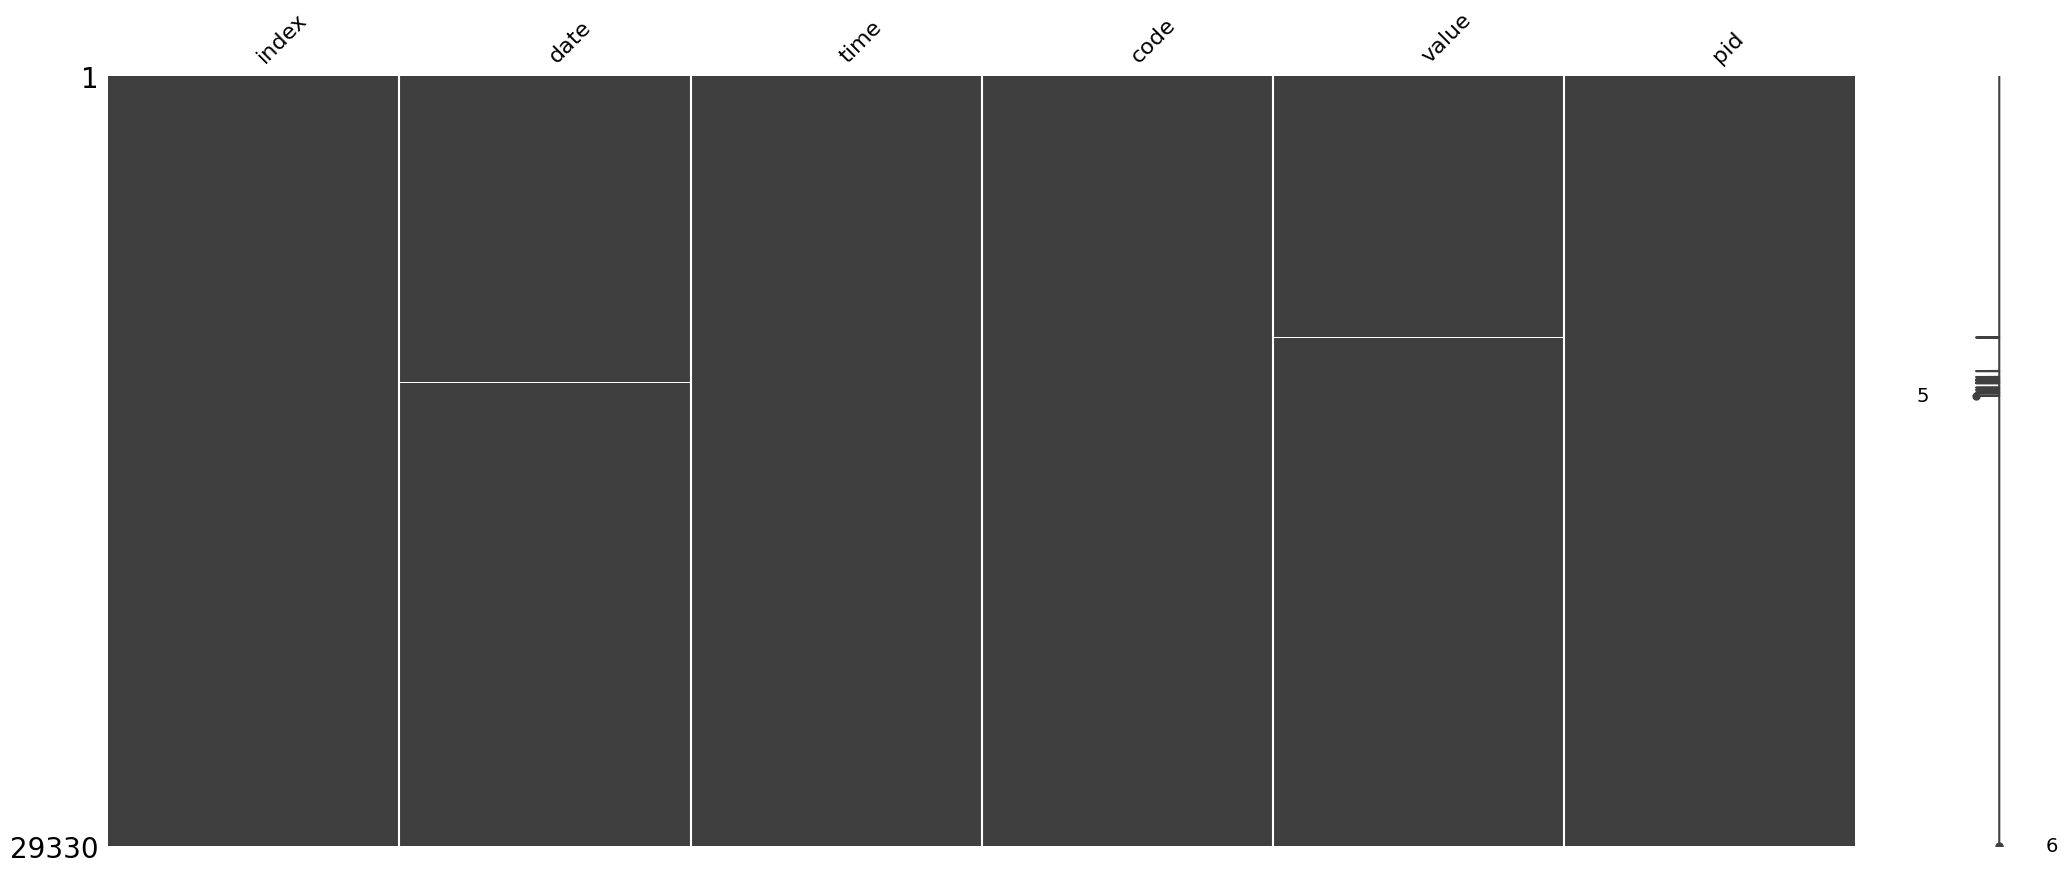

In [5]:
msno.matrix(df_data)

In [6]:
df_data[df_data.isnull().any(axis=1)].pid.value_counts()

29    60
27     6
Name: pid, dtype: int64

29번 환자와 27번 환자에서만 결측이 발생함

In [7]:
df_data[df_data.pid == '29']

,index,date,time,code,value,pid
11032,0,04-29-1990,7:00,58,136,29
11033,1,04-29-1990,7:00,33,007,29
11034,2,04-29-1990,7:00,34,018,29
11035,3,04-29-1990,14:00,60,062,29
11036,4,04-29-1990,14:00,33,004,29
...,...,...,...,...,...,...
12316,1284,12-16-1990,15:00,60,056,29
12317,1285,12-16-1990,15:00,33,005,29
12318,1286,12-16-1990,18:00,62,135,29
12319,1287,12-16-1990,18:00,33,006,29


In [8]:
df_data[(df_data.isnull().any(axis=1)) & (df_data.pid == '29')]

,index,date,time,code,value,pid
11239,207,05-25-1990,7:00,0,NaN,29
11240,208,NaN,201,33,3A,29
11241,209,05-25-1990,7:00,0,NaN,29
11242,210,NaN,004,33,21,29
11243,211,05-25-1990,7:00,0,NaN,29
11244,212,NaN,018,33,22,29
11465,433,07-02-1990,7:00,0,NaN,29
11466,434,NaN,202,33,3A,29
11467,435,07-02-1990,7:00,0,NaN,29
11468,436,NaN,006,33,21,29


In [9]:
df_data[(df_data.isnull().any(axis=1)) & (df_data.pid == '27')]

,index,date,time,code,value,pid
9960,805,10-12-1989,7:00,0,NaN,27
9961,806,NaN,138,33,3A,27
9962,807,10-12-1989,7:00,0,NaN,27
9963,808,NaN,006,33,21,27
9964,809,10-12-1989,7:00,0,NaN,27
9965,810,NaN,016,33,22,27


value가 결측인 레코드와, date가 결측인 레코드가 1:1 매핑이 가능한 것으로 보이나, 우선 제거하고 정상적인 데이터의 분포를 확인한 뒤에 대치하자

In [10]:
df_data = df_data.dropna(how='any')
df_data.shape

(29264, 6)

## 전처리 및 타입 변경

### date

In [11]:
for x in range(df_data.shape[0]):
    try:
        dt.strptime(df_data['date'].iloc[x], '%m-%d-%Y')
    except:
        print(x)

6505
6506
6507
6508
6509
6510
6511


In [12]:
df_data.iloc[6505:6511, 0]

6505    363
6506    364
6507    365
6508    366
6509    367
6510    368
Name: index, dtype: int64

1991년도 6월 31일이 날짜가 아니라서 datetime으로 변경 시 오류가 발생함. 이 데이터를 제거하자.

In [13]:
df_data = df_data[df_data['date'] != '06-31-1991']
print(df_data.shape)

(29257, 6)


In [14]:
df_data['date'] = df_data['date'].apply(lambda x:dt.strptime(x, '%m-%d-%Y'))
df_data['date']

0       1991-04-21
1       1991-04-21
2       1991-04-21
3       1991-04-21
4       1991-04-21
           ...    
29325   1989-05-09
29326   1989-05-09
29327   1989-05-10
29328   1989-05-11
29329   1989-05-12
Name: date, Length: 29257, dtype: datetime64[ns]

### time

In [15]:
df_data['time']

0         9:09
1         9:09
2         9:09
3        17:08
4        17:08
         ...  
29325    08:00
29326    08:00
29327    08:00
29328    08:00
29329    08:00
Name: time, Length: 29257, dtype: object

In [16]:
for x in range(df_data.shape[0]):
    try:
        dt.strptime(df_data['time'].iloc[x], '%H:%M')
    except:
        print(x)

27997
27998
27999
28098
28099


In [17]:
df_data.iloc[27997:28000,:]

,index,date,time,code,value,pid
28070,792,1991-04-09,56:35,58,237,67
28071,793,1991-04-09,56:35,33,16,67
28072,794,1991-04-09,56:35,34,40,67


In [18]:
df_data.iloc[28098:28100,:]

,index,date,time,code,value,pid
28171,893,1991-04-21,188:00,62,128,67
28172,894,1991-04-21,188:00,33,14,67


In [22]:
df_data = df_data.drop(index=[28070, 28071, 28072, 28171, 28172], axis=0)
df_data.shape

(29252, 6)

In [26]:
df_data['time'] = df_data['time'].apply(lambda x:dt.strptime(x, '%H:%M')).dt.time
df_data['time']

0        09:09:00
1        09:09:00
2        09:09:00
3        17:08:00
4        17:08:00
           ...   
29325    08:00:00
29326    08:00:00
29327    08:00:00
29328    08:00:00
29329    08:00:00
Name: time, Length: 29252, dtype: object

### value

In [29]:
df_data.value.astype('float64')

ValueError: could not convert string to float: '0Hi'